### Set Covering Problem

In the following notebook we try different approaches on how to solve the Set Cover Problem

In [21]:
from random import random
from functools import reduce
from collections import namedtuple
from queue import PriorityQueue

import numpy as np
import matplotlib.pyplot as plt

After generating some random subsets we check if the problem is feasible or not.

In [22]:
PROBLEM_SIZE = 20
NUM_SETS = 64
SETS = tuple(
    np.array([random() < 0.5 for _ in range(PROBLEM_SIZE)])
    for _ in range(NUM_SETS)
)

State = namedtuple('State', ['taken', 'not_taken'])

def goal_check(state):
    return np.all(reduce(
        np.logical_or,
        [SETS[i] for i in state.taken],
        np.array([False for _ in range(PROBLEM_SIZE)]),
    ))


assert goal_check(
    State(set(range(NUM_SETS)), set())
), "Problem not solvable"



We create a wrapper to explore the various algorithms

In [23]:
def search(priority):
    frontier = PriorityQueue()
    state = State(set(), set(range(NUM_SETS)))
    frontier.put((priority(state), state))

    counter = 0
    _, current_state = frontier.get()
    while not goal_check(current_state):
        counter += 1
        for action in current_state[1]:
            new_state = State(
                current_state.taken ^ {action},
                current_state.not_taken ^ {action},
            )
            frontier.put((priority(new_state), new_state))
        _, current_state = frontier.get()

    print(
        f"Solved in {counter:,} steps ({len(current_state.taken)} tiles)"
    )

    return current_state.taken

We can now define different priorities to impose which algorithm to follow:
<ul>
  <li><b>Breadth first:</b> The algorithm should prioritize more shallow nodes, exploring each one before going in depth</li> 
  <li><b>Greedy best first:</b> The algorithm should prioritize the "gain", that is, the number of uncovered tiles in each new action</li> 
  <li><b>A*:</b> The priority should be influenced by two parameters:
  <ul>
      <li><b>g(x):</b> Should be equal to the cost of each edge (unitary in this case)</li>
      <li><b>h(x):</b> It's an heuristic that represents how close we are to our goal, in this case it's represented by the number of uncovered tiles</li>
    </ul></li> 
</ul>

In [24]:
def breadth_first(state):
    return len(state.taken)

def greedy_best_first(state):
    return PROBLEM_SIZE - sum(
        reduce(
            np.logical_or,
            [SETS[i] for i in state.taken],
            np.array([False for _ in range(PROBLEM_SIZE)]),
        ))

def a_star(state):
    return greedy_best_first(state) + breadth_first(state)

I also added a function to visualize the solution found by each algorithm, the black boxes represent taken tiles (ones) and the white ones represent non-taken tiles (zeroes), intuitively there should be at least one black box for each column.

In [25]:
def graph(solution, number=1, title=None):
    map = None
    for i in solution:
        if map is not None:
            map = np.vstack((map, SETS[i]))
        else:
            map = SETS[i]

    plt.figure(number)
    plt.imshow(map, cmap='binary')
    ax = plt.gca()
    ax.set_yticks(np.arange(len(solution)), solution)
    ax.get_xaxis().set_visible(False)
    if title is not None:
        plt.title(title)
    plt.show

We can now run the different algorithms and compare the solutions:

Solved in 656 steps (2 tiles)
Solved in 3 steps (3 tiles)
Solved in 4 steps (3 tiles)


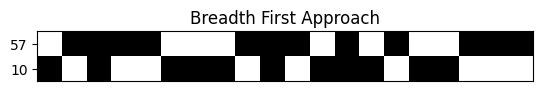

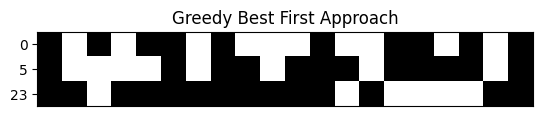

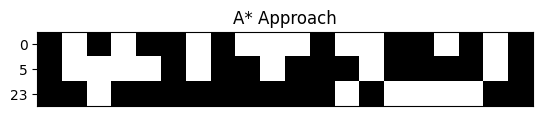

In [26]:
bf = search(breadth_first)
gbf = search(greedy_best_first)
a = search(a_star)

graph(bf, 1, 'Breadth First Approach')
graph(gbf, 2, 'Greedy Best First Approach')
graph(a, 3, 'A* Approach')

## Conclusions
With an unitary cost for each edge traversed the result of the greedy best first and A* algorithms reach the same solution, it's likely that, as the cost of traversing each edge increases the A* algorithm will act more similiarly to the Breadth First Approach (further exploration required)

## References
[Giovanni Squillero for the original code](https://github.com/squillero/computational-intelligence)<br>
Minor contributions by Guido Pio Natalizio